<a href="https://colab.research.google.com/github/IaraSelva/machine_learning/blob/main/Medium01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [50]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [51]:
# Read data
df = pd.read_csv("df.csv")

df

,index,A,B,C,D,E,F,G,H,I,type
0,0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...
209,209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [52]:
# Number of rows
n_rows = df.shape[0]
n_columns = df.shape[1]
print(f'n_rows = {n_rows}\nn_columns = {n_columns}')

n_rows = 214
n_columns = 11


In [53]:
# Column names
column_names = df.columns.tolist()
column_names

['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type']

In [54]:
# Dimensions
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 214
Number of columns: 11


In [55]:
# Describle your datas
df.describe()

,index,A,B,C,D,E,F,G,H,I,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,106.500000,1.670467,16.089626,3.489813,2.745140,101.711215,0.745748,14.330888,0.297710,0.102757,1.542056
std,61.920648,0.003324,0.979979,1.875170,0.948929,1.084305,0.978743,2.276731,0.845669,0.175548,1.707648
min,0.000000,1.660000,12.880000,0.000000,0.550000,97.730000,0.000000,8.690000,0.000000,0.000000,0.000000
25%,53.250000,1.670000,15.490000,2.752500,2.260000,101.190000,0.185000,13.180000,0.000000,0.000000,0.000000
50%,106.500000,1.670000,15.960000,4.520000,2.580000,101.910000,0.830000,13.760000,0.000000,0.000000,1.000000
75%,159.750000,1.670000,16.592500,4.680000,3.100000,102.325000,0.920000,14.677500,0.000000,0.180000,2.000000
max,213.000000,1.690000,20.860000,5.840000,6.650000,105.570000,9.320000,25.900000,5.360000,0.920000,5.000000


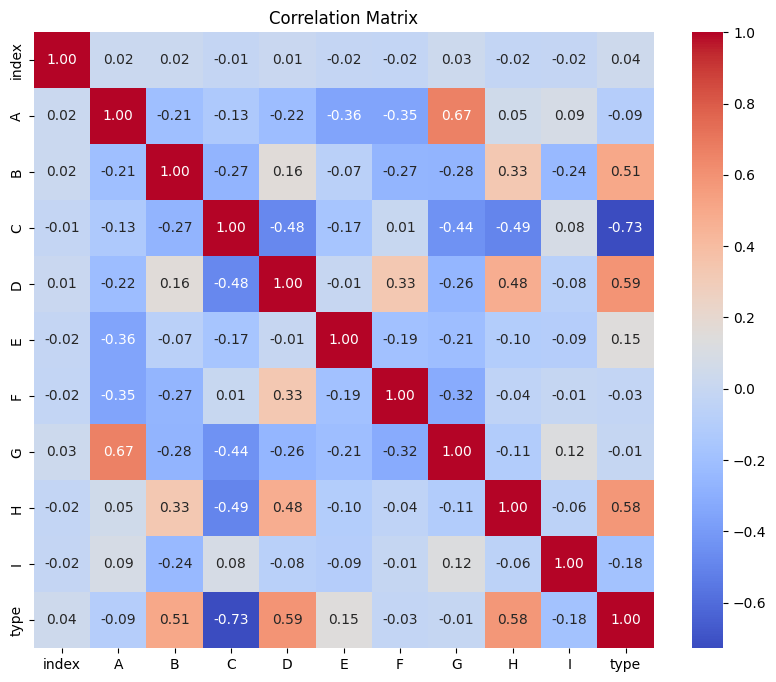

In [56]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




It's my turn to create my heat map.

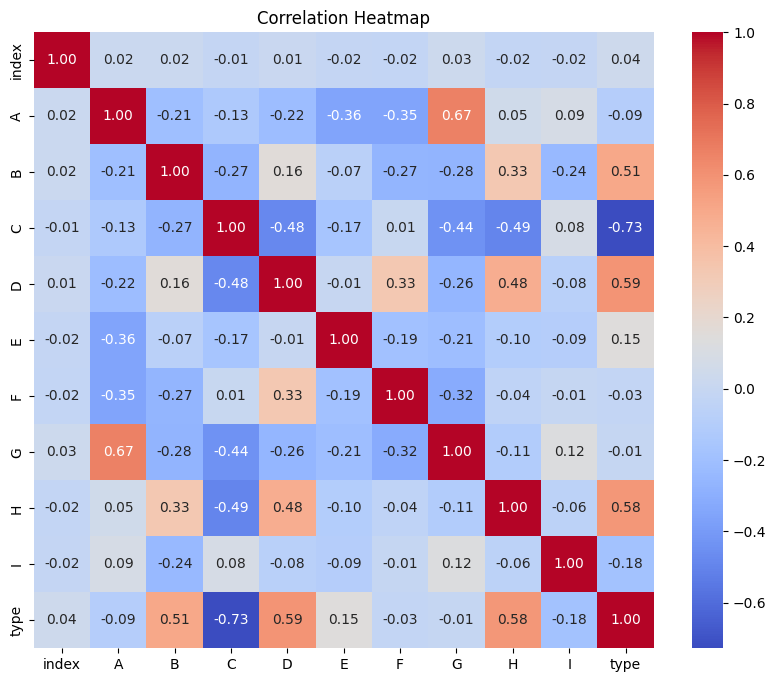

In [57]:
# Drop the 'index' column
df = df.drop('index', axis=1)
df

,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...
209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [72]:
# Training and test data split (70:30)

# Separate features and target variable
y = df['type']
X = df.drop('type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Display class distribution in training and test data

print("Training Data Class Distribution:")
print(y_train.value_counts())

print("\nTest Data Class Distribution:")
print(y_test.value_counts())

Training Data Class Distribution:
type
1    60
0    47
5    16
2    12
3     8
4     6
Name: count, dtype: int64

Test Data Class Distribution:
type
0    23
1    16
5    13
3     5
2     5
4     3
Name: count, dtype: int64


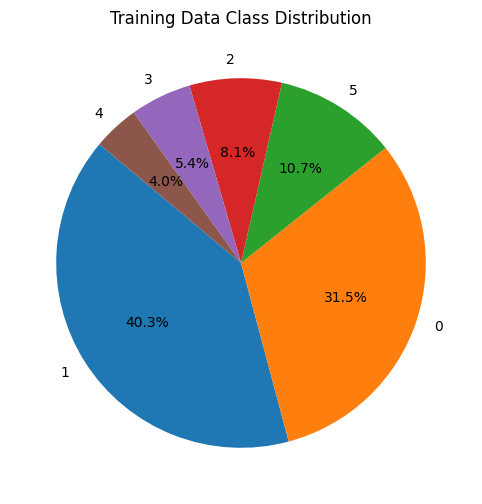

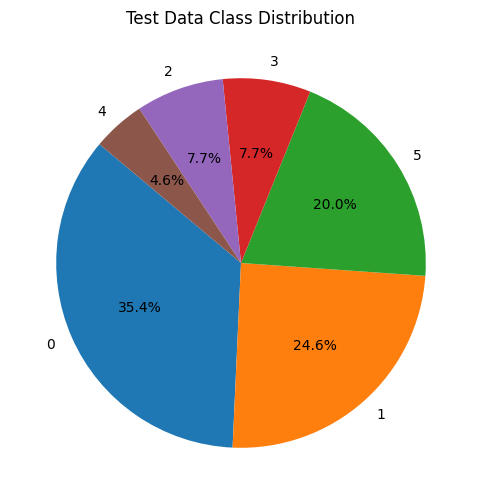

In [74]:
# Plot pie chart for training data class distribution
plt.figure(figsize=(8, 6))
y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Training Data Class Distribution')
plt.ylabel('')
plt.show()

# Plot pie chart for test data class distribution
plt.figure(figsize=(8, 6))
y_test.value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Test Data Class Distribution')
plt.ylabel('')
plt.show()

Now it's my turn to create a pie chart with my class distribution data.

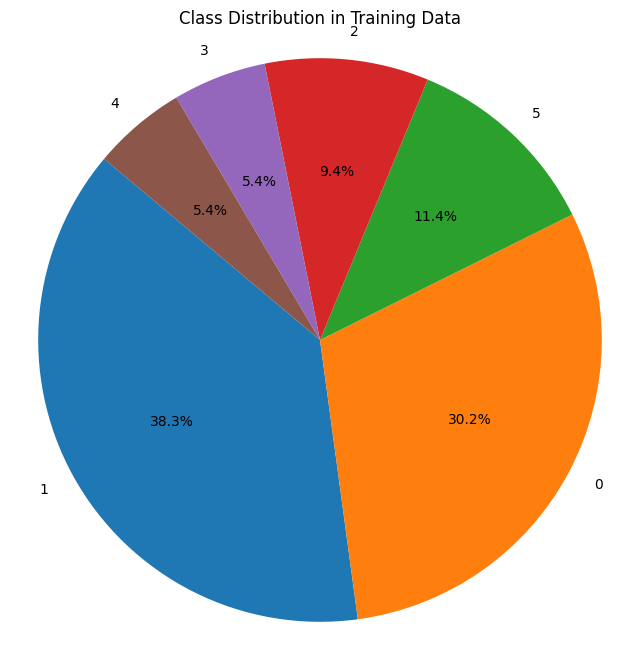

In [77]:
# Multinomial logistic regression model

model = LogisticRegression(multi_class='multinomial')


In [78]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [81]:
# Train the model
model.fit(X_train_scaled, y_train)



In [88]:
# Prediction on the training data

prediction = model.predict(X_train_scaled)

accuracy = accuracy_score(y_train, prediction)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_train, prediction)

print("Confusion matrix on training data:")
print(conf_matrix)



Accuracy: 0.7181208053691275
Confusion matrix on training data:
[[30 17  0  0  0  0]
 [10 49  0  0  1  0]
 [ 7  4  1  0  0  0]
 [ 0  1  0  7  0  0]
 [ 1  0  0  0  5  0]
 [ 0  1  0  0  0 15]]


In [89]:
# Prediction on the test data

prediction = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, prediction)

print("Confusion matrix on test data:")
print(conf_matrix)

Accuracy: 0.6
Confusion matrix on test data:
[[11 11  0  1  0  0]
 [ 2 13  0  0  1  0]
 [ 3  2  0  0  0  0]
 [ 0  2  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  2  0  2  0  9]]


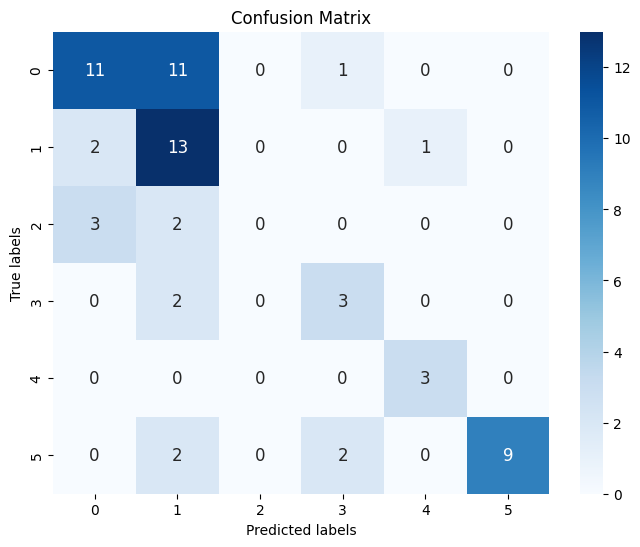

In [93]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

It's my turn to create my confusion matrix.

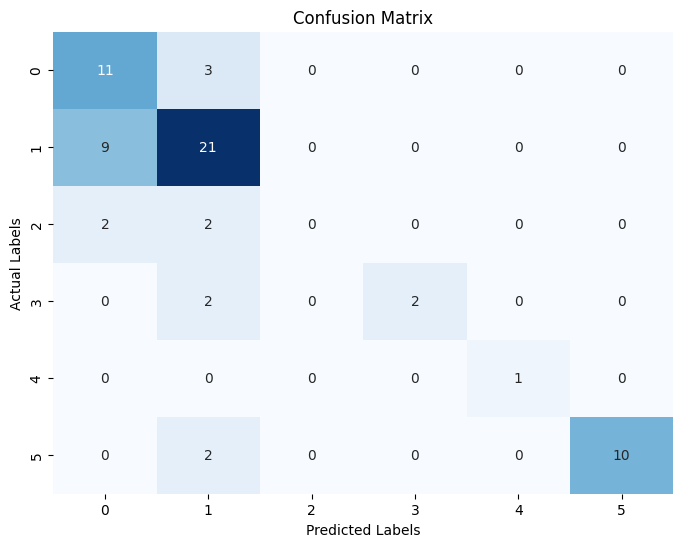